In [12]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [13]:
!pip install pdf2image
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree       
Reading state information... Done
poppler-utils is already the newest version (0.62.0-2ubuntu2.10).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [3]:
import pytesseract

pytesseract.get_tesseract_version()

LooseVersion ('4.0.0-beta.1')

In [4]:
!which tesseract

/usr/bin/tesseract


In [5]:
pytesseract.pytesseract.tesseract_cmd = (
    r'/usr/bin/tesseract'
)

Loading Data

In [6]:
import os

file_path = "/content/data/"
out_path = "/content/output/"

os.mkdir(file_path)
os.mkdir(out_path)

In [7]:
from pdf2image import convert_from_path

PDF_file = '/content/drive/My Drive/SyllabusFIN466-W2020-01-09.pdf'

# Store all the pages of the PDF in a variable 
pages = convert_from_path(PDF_file) 
  
# Counter to store images of each page of PDF to image 
image_counter = 1
  
# Iterate through all the pages stored above 
for page in pages: 
    filename = file_path + "page_"+ str(image_counter) + ".jpg"
    # Save the image of the page in system 
    page.save(filename, 'JPEG') 
  
    # Increment the counter to update filename 
    image_counter = image_counter + 1

Data Preprocessing

In [8]:
import cv2
import numpy as np

# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #changing colourspaces

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5) #median filtering
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
      angle = -(90 + angle)
    else:
      angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED) 

Visualisation

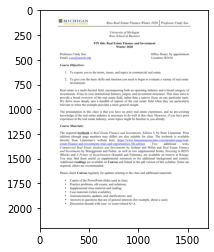

In [9]:
import matplotlib.pyplot as plt

# Plot original image

test_image = cv2.imread('/content/data/page_1.jpg')
b,g,r = cv2.split(test_image)
rgb_img = cv2.merge([r,g,b])
plt.imshow(rgb_img)
plt.show()

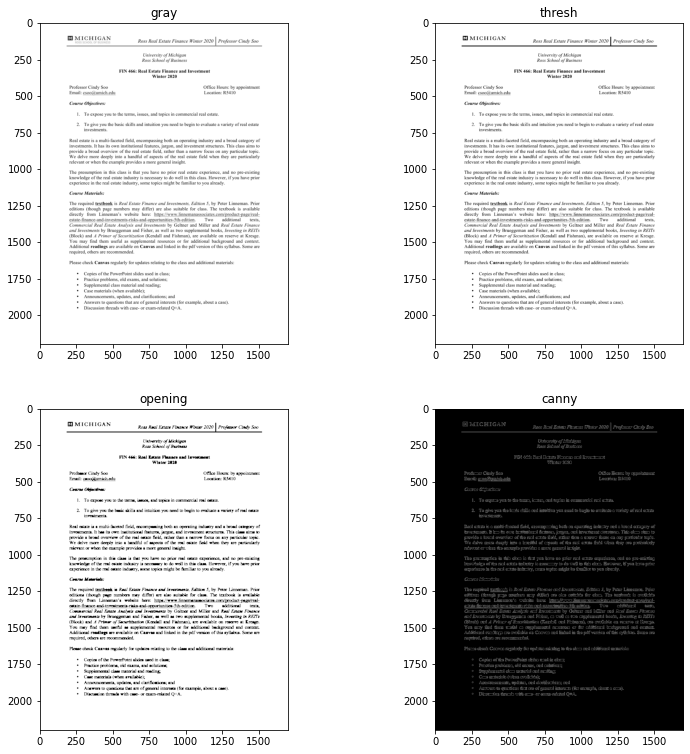

In [10]:
# Preprocess image 

test_image1 = get_grayscale(test_image)
test_image2 = thresholding(test_image1)
test_image3 = opening(test_image2)
test_image4 = canny(test_image3)
images = {'gray': test_image1, 
          'thresh': test_image2, 
          'opening': test_image3, 
          'canny': test_image4}

# Plot images after preprocessing

fig = plt.figure(figsize=(13,13))
ax = []

rows = 2
columns = 2
keys = list(images.keys())
for i in range(rows*columns):
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title(keys[i]) 
    plt.imshow(images[keys[i]], cmap='gray')

Reading using Tesseract

In [11]:
import cv2 
import pytesseract

# Adding custom options
custom_config = r'-l eng --oem 3 --psm 3'

# Read all the images in the folder
for image in os.listdir(file_path): 
  inputPath = os.path.join(file_path, image)  
  img = cv2.imread(inputPath)

  img = get_grayscale(img) #Data Preprocessing
  img = thresholding(img)
  
  text = pytesseract.image_to_string(img, config=custom_config)
  
  # for removing the .jpg from the imagePath 
  image = image[0:-4] 

  full_out_path = os.path.join(out_path, 'time_' + image + ".txt") 
  print(text) 

  # saving the  text for every image in a separate .txt file 
  output_file = open(full_out_path, "w") 
  output_file.write(text) 
  output_file.close()  

Ross Real Estate Finance Winter 2020 | Professor Cindy Soo

Occasional additional handouts will be distributed in class. I will bring handouts to class only once.
If they can be converted to electronic format, you will be able to download them from Canvas.

A financial calculator is recommended but not required for this course. You are however responsible
for knowing how to compute annuities, present values, and other core calculations you learned in
FIN 300/302. As in FIN 300/302, if you decide to use a financial calculator, you are responsible for
knowing how to use these functions. You may find that a financial calculator is useful in solving
certain operations than a non-financial calculator, particularly in the limited time frame of an exam.
Some of the examples in class and problem sets will be solved using a financial calculator, but you
are not required to use one.

Guest Speakers:

Guest speakers may be scheduled outside of normal class time. These may not be in the same week


**Parameters:**

*   **OEM**


0.   Legacy engine only.
1.   Neural nets LSTM engine only.
2.   Legacy + LSTM engines.
3.   Default, based on what is available.
*0 and 2 is not available unless using Tessdata (Default is TessdataFast)*
https://tesseract-ocr.github.io/tessdoc/Data-Files


*   **PSM**

0.    Orientation and script detection (OSD) only.
1.    Automatic page segmentation with OSD.
2.    Automatic page segmentation, but no OSD, or OCR.
3.    Fully automatic page segmentation, but no OSD. (Default)
4.    Assume a single column of text of variable sizes.
5.    Assume a single uniform block of vertically aligned text.
6.    Assume a single uniform block of text.
7.    Treat the image as a single text line.
8.    Treat the image as a single word.
9.    Treat the image as a single word in a circle.
10.    Treat the image as a single character.
11.    Sparse text. Find as much text as possible in no particular order.
12.    Sparse text with OSD.
13.    Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.





Reference:

*   https://github.com/madmaze/pytesseract
*   https://github.com/Belval/pdf2image
*   https://nanonets.com/blog/ocr-with-tesseract/#installingtesseract?&utm_source=nanonets.com/blog/&utm_medium=blog&utm_content=%5BTutorial%5D%20OCR%20in%20Python%20with%20Tesseract,%20OpenCV%20and%20Pytesseract
*   https://www.geeksforgeeks.org/python-ocr-on-all-the-images-present-in-a-folder-simultaneously/
*   https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_table_of_contents_imgproc/py_table_of_contents_imgproc.html
